# Project: **Name of method** in **name of software**

This notebook is a blank slate for you to write in.  Feel free to include figures (don't forget to add/commit them to your repository) and examples.  You can change the kernel (from `Python 3`; see upper right) if the open source project you're writing about does not use Python.  You can write from the prompts below or delete all the cells and start fresh.  Note that Git will always contain your history.

You can run shell commands:

In [1]:
! pip install equadratures


This repository includes many things that we have covered in the course but mainly I wanted to investigte the Polynomial Regression section and their building block classes. The below code snippets and code cells are directly for the repositiry linked here: 
* https://effective-quadratures.github.io/_documentation/poly.html
* https://effective-quadratures.github.io/_documentation/parameter.html


## Parameter Class
This handles the information with the independent variable

Parameter(order, distribution, endpoints=None, shape_parameter_A=None, shape_parameter_B=None, lower=None, upper=None, data=None)

```c
# uniform parameter.
param = Parameter(distribution='uniform', lower=-2, upper=2., order=3)

# beta parameter
param = Parameter(distribution='beta', lower=-2., upper=15., order=4, shape_parameter_A=3.2, shape_parameter_B=1.7)
```


## Polyreg Class
This is the one that actually generates the curve using the information from the parameter

Poly(parameters, basis, method=None, sampling_args=None, solver_args=None)

```c
# Subsampling from a tensor grid
param = Parameter(distribution='uniform', lower=-1., upper=1., order=3)
basis = Basis('total order')
poly = Poly(parameters=[param, param], basis=basis, method='least-squares' , sampling_args={'mesh':'tensor-grid', 'subsampling-algorithm':'svd', 'sampling-ratio':1.0})

# User-defined data with compressive sensing
X = np.loadtxt('inputs.txt')
y = np.loadtxt('outputs.txt')
param = Parameter(distribution='uniform', lower=-1., upper=1., order=3)
basis = Basis('total order')
poly = Poly([param, param], basis, method='compressive-sensing', sampling_args={'sample-points':X_red, 'sample-outputs':Y_red})

# Using a sparse grid
param = Parameter(distribution='uniform', lower=-1., upper=1., order=3)
basis = Basis('sparse-grid', level=7, growth_rule='exponential')
poly = Poly(parameters=[param, param], basis=basis, method='numerical-integration')
```



## Note

It should be noted that we do use the basis class for the index set that is used which in this case is univariate (one type of data). 

You can see both of these implemeted in the code being used below.

Code snippets and code cells below



(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.]),
 <a list of 10 Text yticklabel objects>)

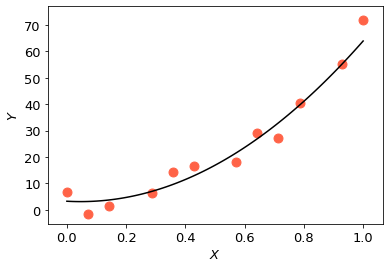

In [11]:
from equadratures import *
import numpy as np

dimensions = 1
M = 12
param = Parameter(distribution='Uniform', lower=0, upper=1., order=1)
myParameters = [param for i in range(dimensions)] # one-line for loop for parameters
x_train = np.mat([0,0.0714,0.1429,0.2857,0.3571,0.4286,0.5714,0.6429,0.7143,0.7857,0.9286,1.0000], dtype='float64')
y_train = np.mat([6.8053,-1.5184,1.6416,6.3543,14.3442,16.4426,18.1953,28.9913,27.2246,40.3759,55.3726,72.0], dtype='float64')
x_train = np.reshape(x_train, (M, 1))
y_train = np.reshape(y_train, (M, 1))

myBasis = Basis('Univariate')
param = Parameter(distribution='Uniform', lower=0, upper=1., order=2)
myParameters = [param for i in range(dimensions)] # one-line for loop for parameters
poly = Poly(myParameters, myBasis, method='least-squares', sampling_args={'sample-points':x_train, 'sample-outputs':y_train} )

poly.set_model()
N = 100
x_test = np.reshape(np.linspace(0, 1, N), (N, 1) )

      # Plot the results
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
for i in range(0, M):
  plt.scatter(x_train[i,0], y_train[i,0], marker='o', s=80, color='tomato')
plt.plot(x_test, poly.get_polyfit(x_test), 'k-')
plt.xlabel('$X$', fontsize=13)
plt.ylabel('$Y$', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

## About the method

This method above is a much more simplistic way than doing things with chebyshev and QR factorization. With this method it also allows us to use other callable functions like get_poly_grad and get_poly_hess. 


![](https://ctjqsa.dm.files.1drv.com/y4mqWRdtMGKIdqOBj4rjr6g1fzjtEkoYhBlcssii2T9OS3bRhw1SkcNeRYqEPbVEWk_1MkXc5-WedVsfXeVAq8dvN-LF5PoG5LUqQ-P3PoyGFl3kkVWl91Q3fQT25wb7fqVyU3Sopsalxxy5cFNTs1CD_CFdZWGzk2atFA_ZjT_MTePdlnf46ndiRRHj-dHLDG21QNbBTwVSDT8QZawOLohVg?width=741&height=512&cropmode=none)



## About the software

Full repository linked here: https://github.com/Effective-Quadratures/Effective-Quadratures

In a nutshell the Effective Quadratures is a library for uncertainty quantification, machine learning, optimisation, numerical integration, and dimension reduction (all using orthogonal polynomials). Specifically these methods are used for outputs with continuous and smooth quantities. Some of the code objectives include probability distrbitions, regression observed machine learning, and sensitivity analysis. 

It mentions that this is an open source platform and is being developed by researchers from univeristies like Univeristy of Cambridge, Stanford, and even The Alan Turing Institute. The code has build passing badge and has 1,371 commits. The language is in python and does require some dependencies like numpy, scipy, and matplotlib. 

I think this notebook has relation to this class and what we have learned so far with regression, hessian models, and integration which is to be learned. But, I think it is specified more towards work practice(to be expected because it is for actual work use) which can sometimes be out of the scope of this class - for example many of the models in this repository are for fluid dynamics and one specifically for turbomachinery.


### Open questions

* This is a more complicated piece of polynomial regression that I found interesting: https://effective-quadratures.github.io/_documentation/tutorial_7.html. It is bayesian polynomial regression but couldn't quite understand all of it, I think it could be useul to take a look and see if you can understand. I have posted some of the code below with the output.


![](https://dzjqsa.dm.files.1drv.com/y4mtJ5fc8cDYg1iOSM2EKyWmekByv8KTfQ0PnzLDq4DUEmKZO1GajDgZ6kyryocX4nAoUIDz_HKB12oadcOxrzMbCrNSpwp-FGhCZtKMCAEGn08jeE1wyBTzgePxEjvi0ufCm5b5VwrQ7HPaTOcWC1XKZu9Ef_7mhQMueOuzCqJV-NcwUyXtR00xfVexdsXryazTYWGhTbJP3ITsPmH-rjh4A?width=740&height=620&cropmode=none)
![](https://bjk10w.dm.files.1drv.com/y4mv6SWJ4hPP_6Ugwg0a3AtmLjEXdSoOCGUZgDpylGVEDSDS62ytuWbKcNGStDLDdQHCrTPhmdXWskLNs5tJSsN8CVd_Feg-5tSTD72vwBIAFkZ_Dvk0hOMRnJoZE2y4sHplMYXXgv5TmeO9Gd2_VSlN-An72vX7TNOvS1W0Iu9gt6IY79ChUkMAqBG07q6S9R_Pn7xKFleLPyMdGl-YpRung?width=698&height=865&cropmode=none)